In [34]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.decomposition import PCA

In [35]:
remove = ('headers', 'footers', 'quotes')
docs = fetch_20newsgroups(subset='train',  remove=remove)
docs_df = pd.DataFrame(docs.data, columns=["text"])
docs_df['topic'] = pd.Series(data=docs.target, index=docs_df.index)
docs_df

,text,topic
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [36]:
stop_words = stopwords.words('english')
sw1 = ['dont','im','also','it','thank','thanks','could','get','would','even','know','say','much','well']
stop_words.extend(sw1)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
docs_df['text'] = docs_df['text'].str.lower()
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
# docs_df['text'] = docs_df['text'].apply(lambda x: lemmatizer.lemmatize(x))
docs_df['text'] = docs_df['text'].apply(lambda x: stemmer.stem(x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub(PUNCTUATION, '', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('\n', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('[\d-]', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
docs_df

,text,topic
0,wondering anyone enlighten car saw day door sp...,7
1,fair number brave souls upgraded si clock osci...,4
2,folks mac plus finally gave ghost weekend star...,4
3,weiteks addressphone number id like informatio...,1
4,article c owcbn pworldstdcom tombakerworldstdc...,14
...,...,...
11309,dn nyedacnsvaxuwecedu david nye dn neurology d...,13
11310,old mac k mac plus problem screens blank somet...,4
11311,installed dx cpu clone motherboard tried mount...,3
11312,require hypersphere space points specifies sph...,1


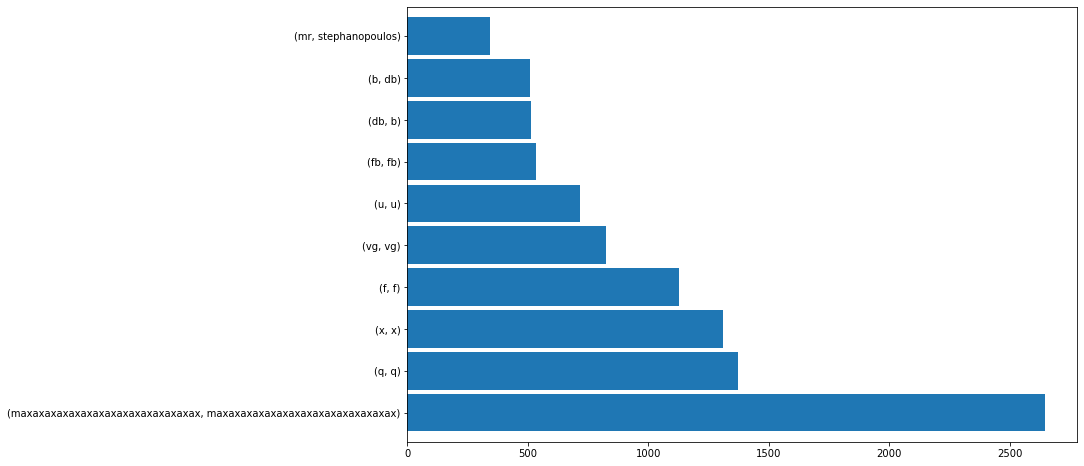

In [41]:
words = ' '.join([i for i in docs_df['text']]).split()
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
plot = bigrams.plot.barh(width=.9, figsize=(12, 8))
fig = plot.get_figure()